## Gathering Reading from Spreadsheet:

In [1]:
# import factory from residual package
from geomagio.residual import SpreadsheetAbsolutesFactory

In [2]:
# initialize factory
saf = SpreadsheetAbsolutesFactory()

In [3]:
# get reading via spreadsheet parsing
reading = saf.parse_spreadsheet(path="../../etc/residual/DED-20140952332.xlsm")

## Gathering Readings from Web Absolutes

In [4]:
# import web absolutes factory from residual package
from geomagio.residual import WebAbsolutesFactory
# import UTCDateTime from obspy for time interpretation
from obspy.core import UTCDateTime

In [5]:
# initialize factory
waf = WebAbsolutesFactory()

In [6]:
# specify required observatory, starttime, and endtime
observatory = "BOU"
starttime = UTCDateTime("2020-01-01T00:00:00Z")
endtime = UTCDateTime("2020-07-01T00:00:00Z")

readings = waf.get_readings(observatory=observatory, starttime=starttime, endtime=endtime)

It should be noted that the get_readings tool has the optional parameter include_measurements that is turned off by default. To get readings with field measurements, users should change this parameter to True.

In [7]:
readings = waf.get_readings(observatory=observatory, starttime=starttime, endtime=endtime, include_measurements=True)

## Calculation from Reading

In [8]:
# import calculation method from residual package
from geomagio.residual.Calculation import calculate

In [9]:
# perform calculation with reading from spreadsheet factory
output_reading = calculate(reading)

## Method Validation

The residual method utilizes fundamental theories from the null method with slight improvements to its consideration of ordinates(magnetometer readings) and residual values. Note that with no existing residual measurement values, null measurements do no receive this added benefit when calculated with this package. Furthermore, resulting calculations should only vary slightly from original values.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# define orignal absolute and baseline arrays for each type
H_o_abs = [reading.absolutes[1].absolute for reading in readings]
H_o_baseline = [reading.absolutes[1].baseline for reading in readings]
D_o_abs = [reading.absolutes[0].absolute for reading in readings]
D_o_baseline = [reading.absolutes[0].baseline for reading in readings]
Z_o_abs = [reading.absolutes[2].absolute for reading in readings]
Z_o_baseline = [reading.absolutes[2].baseline for reading in readings]

In [12]:
# define calculated absolute and baseline arrays for each type
H_c_abs = []
H_c_baseline = []
D_c_abs = []
D_c_baseline = []
Z_c_abs = []
Z_c_baseline = []
# loop through 6 months of readings
for reading in readings:
    # skip calculation when not enough information exists within reading
    try:
        reading = calculate(reading)
    except TypeError:
        D_c_abs.append(np.nan)
        D_c_baseline.append(np.nan)

        H_c_abs.append(np.nan)
        H_c_baseline.append(np.nan)

        Z_c_abs.append(np.nan)
        Z_c_baseline.append(np.nan)
        continue
    # append calculated values from null method calculations
    D_c_abs.append(reading.absolutes[0].absolute)
    D_c_baseline.append(reading.absolutes[0].baseline)
    
    H_c_abs.append(reading.absolutes[1].absolute)
    H_c_baseline.append(reading.absolutes[1].baseline)
    
    Z_c_abs.append(reading.absolutes[2].absolute)
    Z_c_baseline.append(reading.absolutes[2].baseline)

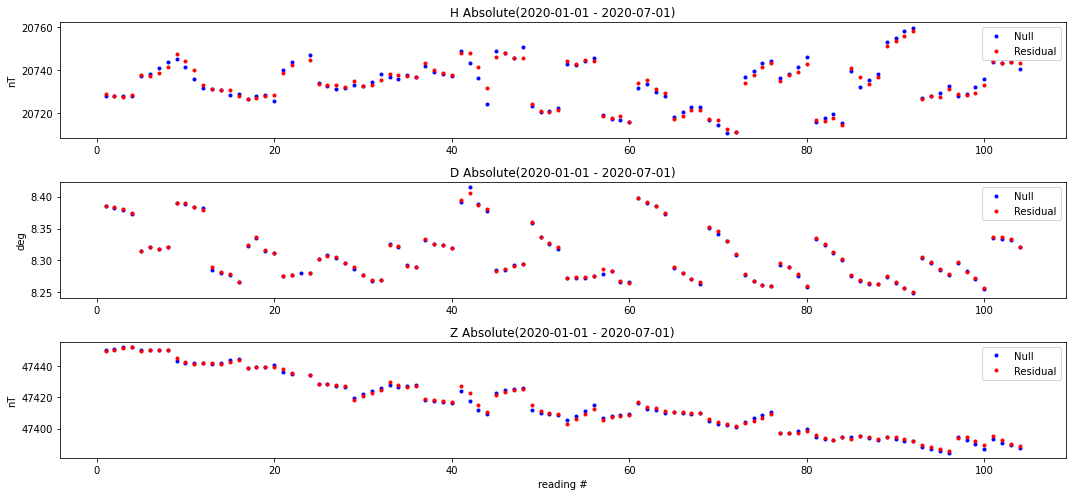

In [13]:
t = np.arange(1,len(readings)+1)

plt.figure(figsize=(15,7))

plt.subplot(3,1,1)
plt.plot(t, H_o_abs, 'b.', label="Null")
plt.plot(t, H_c_abs, 'r.', label="Residual")
plt.legend()
plt.ylabel('nT')
plt.title("H Absolute(2020-01-01 - 2020-07-01)")

plt.subplot(3,1,2)
plt.plot(t, D_o_abs, 'b.', label="Null")
plt.plot(t, D_c_abs, 'r.', label="Residual")
plt.legend()
plt.ylabel("deg")
plt.title("D Absolute(2020-01-01 - 2020-07-01)")

plt.subplot(3,1,3)
plt.plot(t, Z_o_abs, 'b.', label="Null")
plt.plot(t, Z_c_abs, 'r.', label="Residual")
plt.legend()
plt.ylabel('nT')
plt.xlabel('reading #')
plt.title("Z Absolute(2020-01-01 - 2020-07-01)")

plt.tight_layout()

plt.savefig("../images/absolute_validation.png")

plt.show()

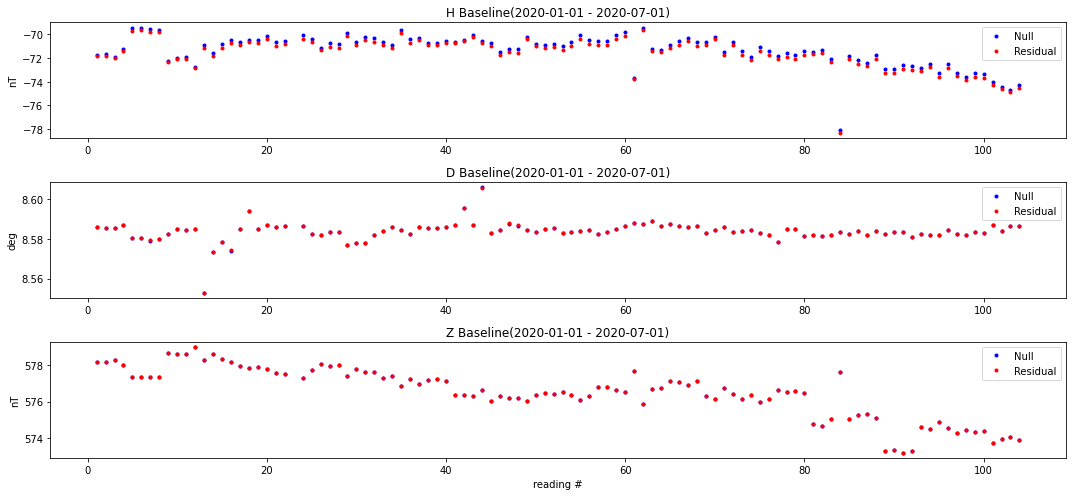

In [14]:
plt.figure(figsize=(15,7))

plt.subplot(3,1,1)
plt.plot(t, H_o_baseline, 'b.', label="Null")
plt.plot(t, H_c_baseline, 'r.', label="Residual")
plt.legend()
plt.ylabel('nT')
plt.title("H Baseline(2020-01-01 - 2020-07-01)")

plt.subplot(3,1,2)
plt.plot(t, D_o_baseline, 'b.', label="Null")
plt.plot(t, D_c_baseline, 'r.', label="Residual")
plt.legend()
plt.ylabel('deg')
plt.title("D Baseline(2020-01-01 - 2020-07-01)")

plt.subplot(3,1,3)
plt.plot(t, Z_o_baseline, 'b.', label="Null")
plt.plot(t, Z_c_baseline, 'r.', label="Residual")
plt.legend()
plt.ylabel('nT')
plt.xlabel('reading #')
plt.title("Z Baseline(2020-01-01 - 2020-07-01)")

plt.tight_layout()

plt.savefig("../images/baseline_validation.png")

plt.show()